Top gene in most populous cell type (T): RPS27


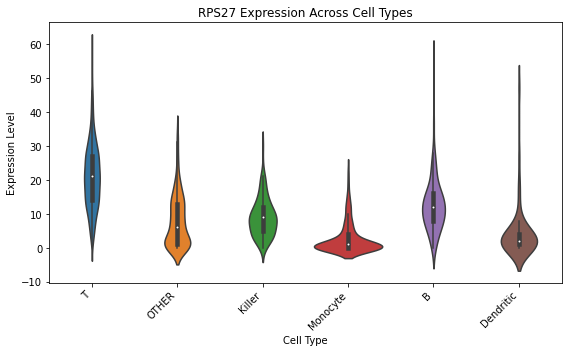

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load annotated matrix
df = pd.read_csv('/home/psaisan/pipcode/results/sample2_gene_matrix.csv')

# Set first column as index (gene names)
df.set_index(df.columns[0], inplace=True)

# Transpose: cells as rows, genes as columns
df = df.transpose()

# Extract cell type from barcode annotations (e.g., AACTT..._CD4_T_Cell)
df['CellType'] = df.index.str.split('_').str[-1]

# Identify the most populous cell type
most_common_type = df['CellType'].value_counts().idxmax()

# Subset cells of that type
subset = df[df['CellType'] == most_common_type]

# Drop the 'CellType' column to calculate gene averages
subset_numeric = subset.drop(columns='CellType')

# Identify the most highly expressed gene (on average) in this cell type
top_gene = subset_numeric.mean().idxmax()
print(f"Top gene in most populous cell type ({most_common_type}): {top_gene}")

# Create violin plot for that gene across all cell types
plt.figure(figsize=(8, 5))
df['CellType'] = df['CellType'].replace('TYPE', 'OTHER')

sns.violinplot(x='CellType', y=top_gene, data=df, inner='box')
plt.title(f'{top_gene} Expression Across Cell Types')
plt.xlabel('Cell Type')
plt.ylabel('Expression Level')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()